# Milestone 2 

## I. Introduction

"BNP Paribas (BNP) is considered one of the top 5 biggest banks in Europe, according to this ranking by assets. Although BNP has grown significantly and is considered one of the largest banks in France, it also operates in most major countries within the European Union (EU). I was hired by BNP as part of the Data Team as a Data Scientist."

Last year, our company faced a problem with customer assets. Many customers closed their accounts, and the numbers raised concerns within BNP. The management aimed to reduce the customer churn rate. The Data Team received a dataset detailing customer activity, and we were tasked with analyzing the activity of customers before they closed their accounts. 

The Data Team asked me to analyze this detailed activity dataset and derive several actionable insights from it. Furthermore, they intend to build a predictive model based on customer activity. The model should be capable of predicting customer behavior in relation to churn. For instance, the model might predict that Customer A has a high likelihood of remaining a customer. In another case, Customer B's activity may resemble that of a customer likely to close their account. Therefore, the bank could offer targeted ads or campaigns to retain this customer, or potentially turn them into a loyal customer.

The business metric that I will use is churn rate. The goal is to minimize the churn rate of BNP customers to 5%. The model will be evaluated based on recall because we aim to reduce the number of false negatives.

| Predicted | Negative (0)| Positive(1) |
|---------- |----------|----------|
|Actual | ----- | ---- |
| 0 (Negative) | True Negative | False Positive |
| 1(Positive) | False Negative | True Positive |

True Positive (TP): The model predicts the customer will leave the bank, and the actual outcome is the customer does leave. This is a correct prediction and is the desired outcome for churn prediction when focusing on those at risk of leaving.
True Negative (TN): The model predicts the customer will stay with the bank, and the actual outcome is the customer does stay. This is also a correct and positive outcome.
False Positive (FP): The model predicts the customer will leave, but the customer actually stays. This is a false alarm, and while not ideal, it might still trigger unnecessary actions like retention campaigns.
False Negative (FN): The model predicts the customer will stay, but the customer actually leaves. This is a missed opportunity, where the customer churns but was not identified as at risk, which could lead to revenue loss.

Best and Worst Cases:

True Positives (TP) and True Negatives (TN) are ideal scenarios, as the model correctly predicts the customer's behavior, whether they leave or stay.
False Predictions:
False Positives (FP): The model predicts churn, but the customer stays. This could lead to unnecessary efforts to retain a customer who isn’t planning to leave, which might waste resources.
False Negatives (FN): The model predicts that the customer will stay, but they actually leave. This is the worst-case scenario for the business, as you fail to take preventive action to retain a customer who ends up churning.

If we start with the false positive case, the model predicts that a customer will leave the bank. In response, we offer a discount or targeted marketing to ensure the customer stays. However, in reality, the customer was not planning to leave, so we provided unnecessary marketing efforts. What is our loss? Perhaps a few dollars for the marketing or discount, but for a large bank, this is acceptable. As long as the customer stays, there is still the potential for future profit, making this a manageable trade-off

Now, let's consider the false negative case. The model predicts that the customer will not leave, so our system doesn't offer any discounts or targeted marketing. In the next period, the customer has already left. This results in a loss for us. If this continues, the customer churn rate will increase, and we could experience a significant decline in profit. Therefore, rather than losing customers, it’s better to invest in additional marketing to ensure the churn rate remains relatively low. This is why, in this case, minimizing false negatives is the right metric for evaluating the model.

The management has also requested additional insights from the dataset, with the goal of enabling further actionable, data-driven decisions. To summarize, our objectives are as follows: derive key insights from the data, build a predictive model for customer churn, and use recall as the evaluation metric to assess the model's performance. These are the primary tasks to be accomplished.

Another information to read about the importancy of customer churn rate to stay low [link1](https://static.googleusercontent.com/media/research.google.com/id//pubs/archive/36678.pdf) [link2](https://mtarget.co/blog/mengenal-customer-churn/)

## II. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, pearsonr
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTENC
import pickle

The used library has been imported. We can continue to Data Loading section.

## III. Data Loading

In [2]:
# Data Loading Coding Section
df= pd.read_csv('dataset_churn.csv')
df_copy = df.copy()
# Show the random sampling 20 rows
df.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
625,626,15604119,Alderete,850,Spain,Male,35,7,110349.82,1,0,0,126355.80,0
4044,4045,15607142,Parkin,658,France,Male,32,8,0.00,1,1,1,80410.68,0
3508,3509,15614230,T'an,426,France,Female,34,3,0.00,2,1,1,61230.83,0
8466,8467,15772383,Toscani,613,France,Male,36,9,131307.11,1,0,0,83343.73,0
2711,2712,15775741,Powell,608,France,Female,28,9,0.00,2,1,1,125062.02,0
3802,3803,15629551,Cattaneo,615,Germany,Female,44,9,126104.98,2,0,1,110718.02,0
976,977,15570060,Palerma,586,France,Female,43,8,132558.26,1,1,0,67046.83,1
5100,5101,15582404,Miller,572,Spain,Female,26,5,0.00,2,1,0,119381.41,0
802,803,15681554,Alley,614,Germany,Female,31,7,120599.38,2,1,1,46163.44,0
4670,4671,15706200,Graham,637,Germany,Male,41,2,138014.40,2,1,0,140298.24,0


The table shows a sample of a customer data from a bank. It is focusing on characteristic relevant to churn analysis. On the columns section shows about the surname, geography of the customers and also the gender. These variables are commonly used in customer segmentation to understand the characteristic of the customer and also the behavior. The Column Exited indicates whether the customer has churned (with a value of 1) or remained (with a value of 0), making it a key target variable for churn analysis. 

In the demographic data, we can look on the Geography, Gender, and Age that can be concluded later as many insights. These insights are important for the company as a background for data driven decision. Moreover, Tenure represents how long a customer has been with the bank, which are important predictors for customer loyalty. Finally, financial indicators like Balance and EstimatedSalary inform the economic engagement of each customer with the bank.

In [3]:
# check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The figure table above represent the simple information about the columns in this dataset. Many informations are available and ready to be pulled from the table. The dataset stores 10000 rows and 14 columns including the demographical information about the customer and also the private information of customer such as the Balance or the estimated salary. The features (columns) display 10.000 Non null count which means that all of the column are filled normally and no missing value. On the other hand, the data type present the type data of the column, such as int for numerical number especially discret number and object ilustrate as a words data. 

Based on the summary of the dataset, the data types assigned to each column are appropriate and well-suited for their respective features. Numerical columns, such as CreditScore, Age, Tenure, and Balance, are correctly classified as integers or floats, which allows for effective calculations and statistical analysis. Categorical columns like Geography, Gender, and Surname are represented as objects (strings), which is the appropriate format for non-numeric data.

In [4]:
# check the central tendency about the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


The previous figure consist of statistical central tendency about numerical value on the dataset. Several key information represent on the figure including mean, standard deviation(std) , min for the minimum data and max for the range maximum of the data and quantile point. The average customer age of the bank is 39 years old with the standard deviation about 10 points. This findings gives us information that the central point of data is near from the average point. If we are assuming the data is normal distribution, than we can conclude that 68% population on the range 29 until 49 years old, 95 % of population are in the range . But this assumption is only for the normal distribution. 

On the balance the average balance of our customer is 76000 euro. Another information comes from credit score with the mean of 650. Many information could be extracted from the figure next we go to the next section checking the duplicate. 

In [5]:
# cek duplikat
df.duplicated().sum()

0

Duplicated data is 0

In [6]:
# drop unnecessary column
df.drop(columns=['RowNumber'],axis=1,inplace=True)
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

The RowNumber column has been deleted

In [7]:
#cek missing value
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Although we knew that there was no missing value from the one section above we still try to ensure again on this section. The indicators reveal no missing value on the dataset. Next we go further to the exploratory data analysis. 

## IV. Exploratory Data Analysis

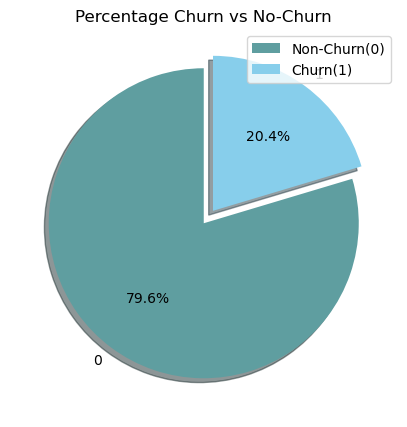

In [8]:
# create pie chart about churn rate
churn= df['Exited'].value_counts()
plt.figure(figsize=(5,6))
plt.pie(churn, labels=churn.index, autopct='%1.1f%%', startangle=90, colors=['CadetBlue', 'SkyBlue'], explode=(0, 0.1), shadow=True)
plt.title('Percentage Churn vs No-Churn')
plt.legend(labels=['Non-Churn(0)','Churn(1)'])
plt.show()

On the previous figure shows about the information Churn and No Churn percentage. 20% of the bank customer is churn in the last year. Basically your churn rate is 20%. It means if we have 100 customers , every year we lose almost 20 from the customer. This faces significant challenge,because we have to replace the 20 customers. Furthermore, even if the bank acquires 20 new customers, the net growth remains at zero, making it difficult to achieve any real expansion compared to the previous year.  

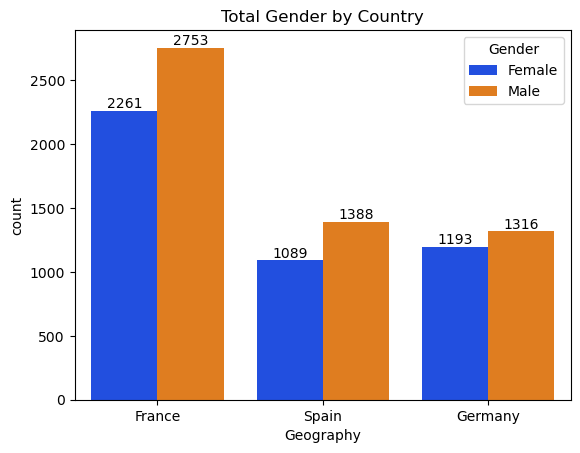

In [9]:
# create countplot
ax = sns.countplot(data=df, x='Geography', hue='Gender',palette='bright')

# adding value on the bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  
plt.title('Total Gender by Country')
# show the figure
plt.show()

France still dominated with the total customer about 5000 customers and the gender gap is about 500 points. Germany and spain are placed on the second with the slight different on the total number of customer. Male customers dominate female customers with the slight gap.

In [10]:
# leave customer by country
grupbycountry=df.groupby('Geography')['Exited'].sum()
grupbycountry

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

Based on our analysis, the majority of churned customers are from Germany. Out of approximately 2,500 German customers, 814 have churned. This means that more than 30% of our German customer base is likely to churn, as the calculation reveals. (814 / 2500 * 100) = 0.32 . This is a significant portion of the customer base, indicating that over one-third of our German customers are at risk of leaving. Understanding the reasons behind this high churn rate in Germany should be a priority, as addressing these issues could have a considerable impact on retention and overall business performance.

Next we show a pie percentage to get better understanding.

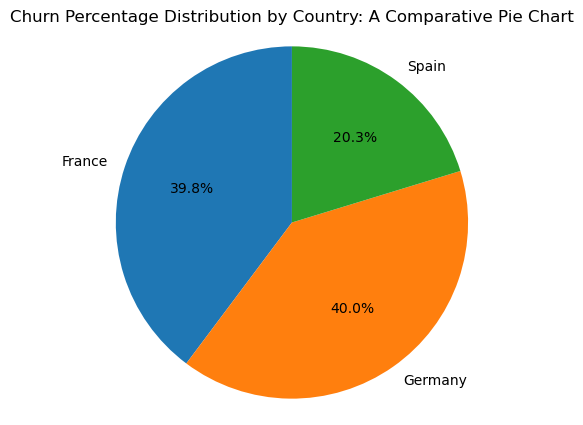

In [11]:
# Make pie chart
plt.figure(figsize=(5, 5))
plt.pie(grupbycountry, labels=grupbycountry.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Percentage Distribution by Country: A Comparative Pie Chart')
plt.axis('equal') # make it perfectly round
plt.show()

Germany is closely followed by France, with only a 0.2% gap in churn rates between the two countries. Indeed, the most frequent churned customers come from either Germany or France. However, the real insight emerges when we calculate the churn rate relative to the total customer base in each country.

When compared to their total customer base, 16% of French customers have churned, as indicated by the calculation. (810 / 5014 * 100)= 16%. Spain calculation (413/2400 * 100) = 0.17, spain has 17 % churned customers. 

The similarity in churn rates between France and Spain is understandable, given their close percentages. However, Germany stands out with a 30% churn rate, which is significantly higher. This large disparity raises questions about the underlying factors driving such a high churn rate in Germany, despite similar patterns observed in France and Spain. Investigating this anomaly further could reveal key insights into customer behavior and retention strategies specific to the German market.

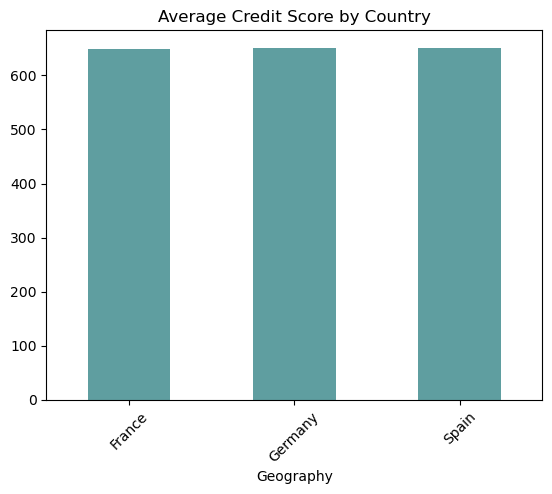

In [12]:
# Create figure for average credit score by country
mean_credit_country=df.groupby('Geography')['CreditScore'].mean()
mean_credit_country.plot(kind='bar',color= '#5F9EA0')
plt.xticks(rotation=45)
plt.title ('Average Credit Score by Country')
plt.show()

The average credit score across all countries is fairly consistent, hovering around 600 points. Given this uniformity, the company has little concern about expanding into these markets with regard to credit scores. Our system has already implemented a robust filtering process to select customers with the highest credit scores, ensuring the quality of our customer base. This proactive approach mitigates potential risks and guarantees that we maintain a strong, reliable customer portfolio, regardless of the country we expand into.

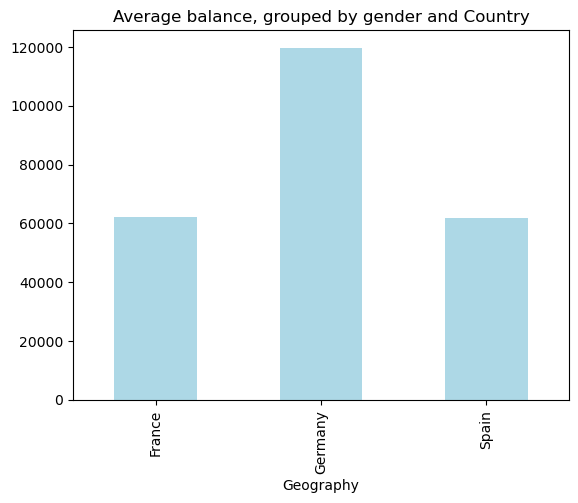

In [13]:
# balance by country
plote=df.groupby(['Geography'])['Balance'].mean()
plote.plot(kind='bar',color = 'lightblue')
plt.title('Average balance, grouped by gender and Country')
plt.show()

Germany stands out with the highest average balance among our customers. While Spain and France follow closely behind, the difference in their average balances is relatively small. However, a striking observation is that the average balance held by German customers is double that of customers from other countries.

This raises an intriguing question: Do German customers prefer banks with higher interest rates? The large sums of money they keep in their accounts suggest they may be seeking higher returns on their assets. This behavior could explain why they tend to move their funds to banks offering the most competitive yields. 

This hypothesis aligns with our earlier findings, where Germany's churn rate stands at 32%, significantly higher than the 16% churn rates observed in France and Spain. The stark contrast in churn rates further strengthens the suspicion that German customers may be more financially opportunistic, driven by a desire for better returns.

Given this insight, it is essential to investigate the relationship between high balances and churn rates. Conducting a survey to explore whether customers with higher balances are more likely to churn could provide valuable information. Understanding the factors driving this behavior would enable us to tailor retention strategies, particularly for high-value customers who are more likely to move their assets in search of better returns.

Moreover, customers with higher balances also tend to spend more compared to those with lower balances. This behavior is understandable, as they have more financial resources at their disposal. If these high-balance customers choose to use our credit cards for their expenditures, it presents a significant opportunity for increased revenue and profitability.

By encouraging these customers to channel their spending through our credit cards, we could capture a larger share of their transactional activities. This could result in higher transaction fees, interest revenue, and increased loyalty through reward programs. Targeted marketing campaigns focused on the benefits of using our credit card for larger purchases could further solidify this relationship, maximizing both customer satisfaction and business profit. 

Next we go to product usage

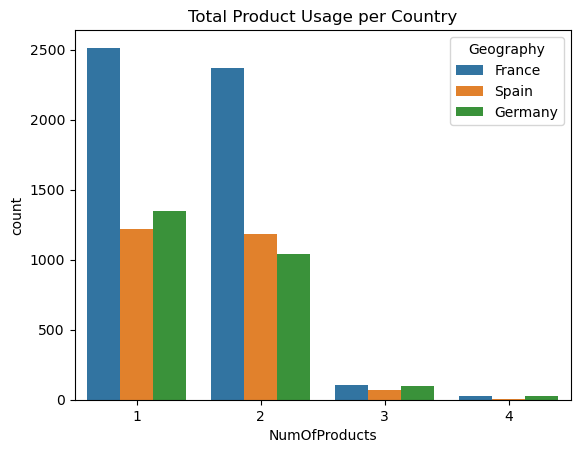

In [14]:
# total user product
sns.countplot(data= df, x= 'NumOfProducts',hue='Geography')
plt.title('Total Product Usage per Country')
plt.show()

This represents the total number of product engagements by our customers. For instance, if a customer uses both our credit card and deposit account, they would be utilizing two of our products.

To maximize customer engagement and deepen relationships, we need to encourage customers to adopt more of our products. A targeted approach could involve offering specific customers bundled packages, such as loans or deposit accounts, tailored to their needs. By promoting multi-product usage, we can increase customer loyalty, improve product utilization, and ultimately enhance profitability.

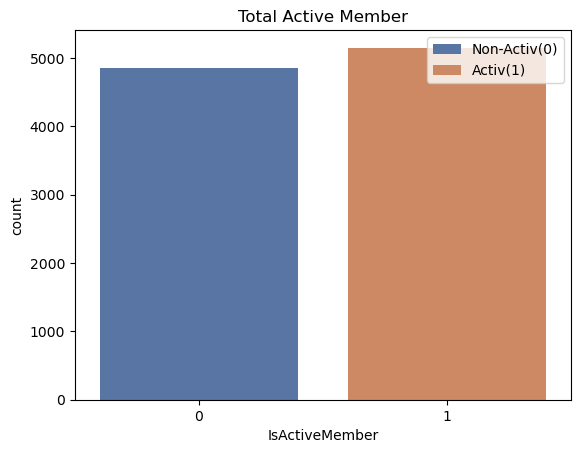

In [15]:
# 
sns.countplot(data= df, x= 'IsActiveMember',palette='deep',hue='IsActiveMember')
plt.title('Total Active Member')
plt.legend(labels=['Non-Activ(0)','Activ(1)'])
plt.show()

When comparing active and inactive users in our dataset, the results reveal only a small gap between the two groups. This highlights a key area for improvement: increasing the number of active users is essential for maximizing profitability.

To address this, we need to focus on re-engaging inactive users through targeted campaigns, personalized offers, or incentives that encourage them to return to active status. Additionally, strengthening our engagement strategies for current active users will help sustain and grow this segment, ultimately driving higher revenue and long-term customer loyalty.

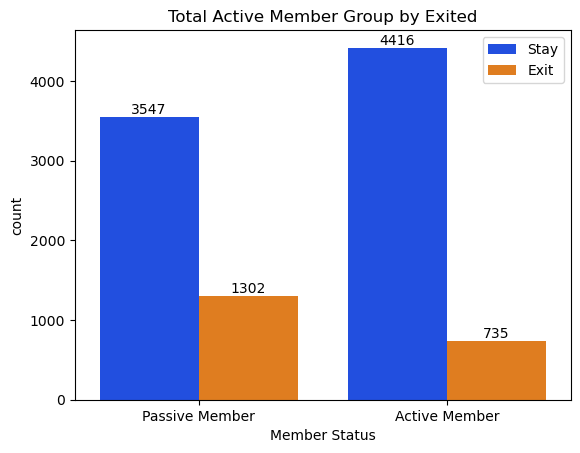

In [16]:
# Activity vs Exit Grouped by
ax = sns.countplot(data= df, x= 'IsActiveMember',palette='bright',hue='Exited')
# adding value on the bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  
plt.title('Total Active Member Group by Exited')
plt.xlabel('Member Status')
plt.xticks(ticks=[0, 1], labels=['Passive Member', 'Active Member'])
plt.legend(labels=['Stay','Exit'])
plt.show()

Focus on the passive member,  on the passive member 1300 of the passive member did stop our service last year. Comparing with the active member only 735 leave from our customer base. The passive member are more likely to stop the service. For simple understanding and explanation. 13 % of churned customer is coming from passive member and only approximately 7% are contributed from active member. 

C:\Users\asanm\AppData\Local\Temp\ipykernel_13280\4256647243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= df, x= 'HasCrCard',palette='colorblind')


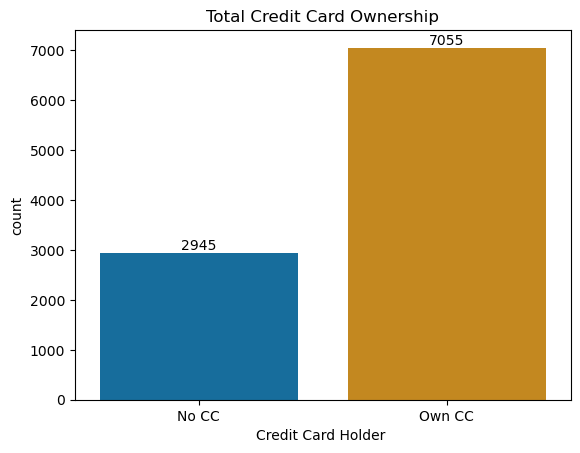

In [17]:
# coding about credit card ownership and visualize
# create countplot
ax = sns.countplot(data= df, x= 'HasCrCard',palette='colorblind')

# adding value on the bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Credit Card Holder ')
plt.xticks(ticks=[0, 1], labels=['No CC', 'Own CC'])

plt.title('Total Credit Card Ownership')
plt.show()

70 % of customer base have credit card. 

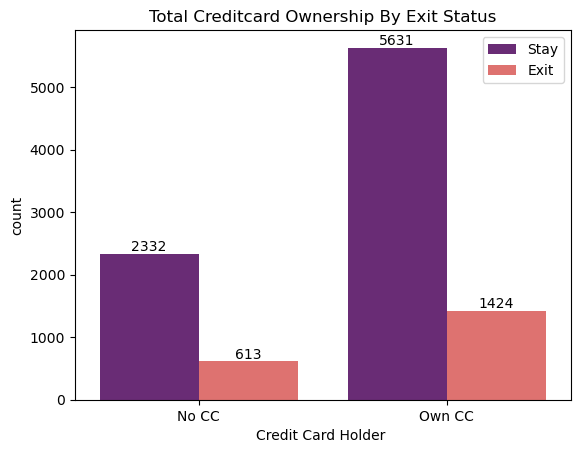

In [18]:
# create countplot
ax = sns.countplot(data= df, x= 'HasCrCard',hue='Exited',palette='magma')

# adding value on the bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Credit Card Holder ')
plt.xticks(ticks=[0, 1], labels=['No CC', 'Own CC'])
plt.legend(labels=['Stay','Exit'])
plt.title('Total Creditcard Ownership By Exit Status')
plt.show()


Churn rates appear to be significantly higher among customers who own credit cards compared to those who do not. This trend suggests that credit card ownership may be linked to an increased likelihood of leaving our services.

We need to investigate other potential factors that could be contributing to the higher churn rate among credit card holders. Key areas to explore include the competitiveness of our credit card offerings, the effectiveness of our discount and rewards programs, and any other factors related to the overall credit card experience.

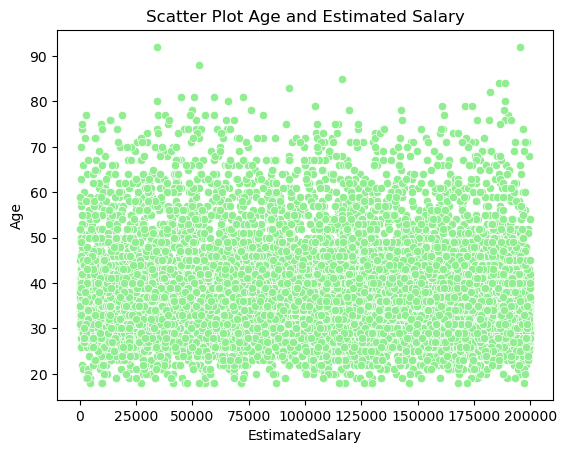

In [19]:
# scatter plot age and balance
sns.scatterplot(data=df, x= 'EstimatedSalary' , y = 'Age',color='lightgreen')
plt.title('Scatter Plot Age and Estimated Salary')
plt.show()

The previous table inform about the scatter plot fiture Age and Estimated Salary. From a visual inspection alone, the corelation between those features is extremely difficult to interpret whether is positively or negatively correlated. there doesn't seem to be a strong visible trend or pattern.

To gain a better understanding of the numerical data such as 'Balance,' 'Age,' or 'Estimated Salary,' we plan to create a new copy of the dataframe and generate new categorical columns. By converting these numerical features into categorical variables, it will simplify the interpretation of the data and help us identify trends or patterns more easily.

We are segmenting customer age groups into 10-year intervals. This approach is based on the assumption that individuals within a similar age range often share common characteristics and life stages. For example, a 40-year-old and a 42-year-old may hold similar positions at work, possibly as senior professionals, which can reflect shared financial behaviors, responsibilities, and needs.By grouping ages in this way, we aim to capture these commonalities and patterns more effectively.

In [20]:
# Create new dataframe from the original data set as a copy to perform modification 
df3= df.copy()
# create new category
bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]  # Batasan umur
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']  # Label untuk setiap grup

# Using pd.cut tp make new column 'AgeGroup'
df3['AgeGroup'] = pd.cut(df3['Age'], bins=bins, labels=labels, right=False)
#check
df3.sample(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
4551,15715673,Niu,651,Spain,Female,46,4,89743.05,1,1,0,156425.57,1,40-50


A new column 'Age Group' has been created. 

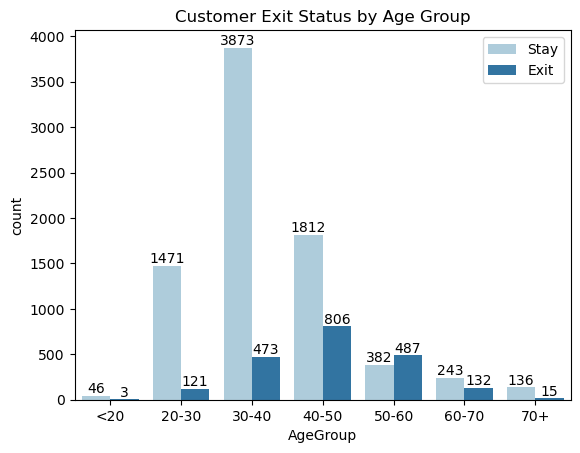

In [21]:
# create countplot
ax = sns.countplot(data= df3, x= 'AgeGroup',hue='Exited',palette='Paired')

# adding value on the bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Customer Exit Status by Age Group') 
plt.legend(labels=['Stay','Exit'])
plt.show()

The age group of 40-50 has the highest concentration of exited customers, making it the most vulnerable segment. This is followed closely by the 50-60 age group, which ranks second in terms of customer churn.

These findings suggest that middle-aged customers are more prone to discontinuing services, likely driven by life stage factors such as career transitions, financial planning for retirement, or changing personal needs. Understanding the specific reasons behind this trend will be crucial for developing targeted retention strategies aimed at these age groups, ensuring we can better address their evolving needs and reduce churn.

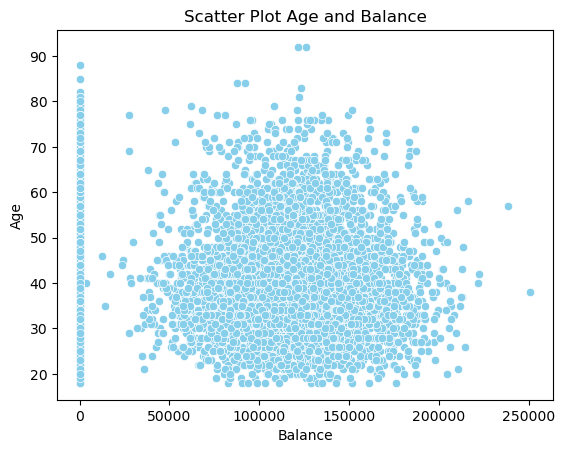

In [22]:
# scatter plot age and balance
sns.scatterplot(data=df, x= 'Balance' , y = 'Age',color = 'skyblue')
plt.title('Scatter Plot Age and Balance')
plt.show()

We’ve observed that some customers in our database have a zero balance, which may indicate inactive accounts or underutilized services. Additionally, the distribution of our customers' balances largely falls within the 50,000 to 200,000 range. While there may be outliers outside this range, the majority of our customers maintain balances within this band, indicating that it represents the core segment of our customer base.

This insight suggests that customers with balances between 50,000 and 200,000 make up a significant proportion of our portfolio. Understanding the behaviors and needs of this key group will be crucial in designing products and services that cater to their financial habits, while also addressing outliers and zero-balance accounts to improve overall engagement and profitability.

create a new column to calculate the total number per group.

In [23]:
# Creating a segment per 25000K and we are also trying to calculate the 0 account. 
bins = [0, 1, 25000, 50000, 75000, 100000, 125000, 150000, float('inf')]  # Threshold for 0 Balance
labels = ['0', '1-25K', '25-50K', '50-75K', '75-100K', '100-125K', '125-150K', '150K+']  # Label for each group

# Using pd.cut to create new column
df3['BalanceGroup'] = pd.cut(df3['Balance'], bins=bins, labels=labels, right=False)
df3.sample(1)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,BalanceGroup
5394,15668853,Menhennitt,637,Spain,Female,44,0,157622.58,1,1,1,120454.2,0,40-50,150K+


The new column has been created. 

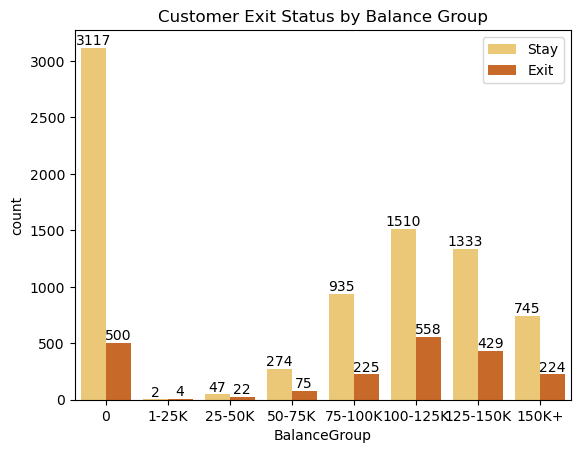

In [24]:
# create countplot
ax = sns.countplot(data= df3, x= 'BalanceGroup',hue='Exited',palette='YlOrBr')

# adding value on the bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Customer Exit Status by Balance Group') 
plt.legend(labels=['Stay','Exit'])
plt.show()

Out of our customers who closed their accounts, 500 had a zero balance, with the highest number of closures occurring in the balance group of 100K - 125K. This strongly suggests that some of these account closures may have been triggered automatically by the system. It is plausible that accounts with a zero balance for an extended period were automatically closed by the system as part of its operational policy. However, we need to confirm this hypothesis with the relevant team to ensure whether the automatic closure of zero-balance accounts is indeed in place.

There appear to be three major groups in the figure above. 0 Group, 1-100 K and more 100K. lets slice the dataset in this way. 

In [25]:
# using coding
prep_list= []

for i in df3['Balance']: 
    if i == 0 : 
        prep_list.append('0')
    elif 0 < i <= 100000 : 
        prep_list.append ('1 - 100 K')
    elif i > 100000 :
        prep_list.append('100K +') 
    else : 
        prep_list('Unknown')
df3['Balance33Group'] = prep_list
# show result sample
df3.head(1)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,BalanceGroup,Balance33Group
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,40-50,0,0


New column has been created. lets create the slicing. 

In [26]:
# show the calculation with new parameter 
df3[df3['Exited']==1]['Balance33Group'].value_counts()

Balance33Group
100K +       1211
0             500
1 - 100 K     326
Name: count, dtype: int64

It is indeed true that upon recalculating based on the three primary parameters (0, 1-100K, and 100K+), we found that the tendency for customer churn is significantly higher among those with a high balance. Specifically, 1,211 customers, or approximately 60%, belong to this high-balance group. 

This supports my earlier hypothesis about understanding the behavior of German customers. It turns out that the majority of churn comes from customers with high balances (100k+). 

In [27]:
# Create the category
bins = [0, 30000, 60000, 90000, 120000, 150000, 180000, float('inf')]  # Batasan estimated salary sampai 180K+
labels = ['<30K', '30-60K', '60-90K', '90-120K', '120-150K', '150-180K', '180K+']  # Label untuk setiap grup

# Create new column to define the salary group
df3['SalaryGroup'] = pd.cut(df3['EstimatedSalary'], bins=bins, labels=labels, right=False)
#check
df3.sample(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,BalanceGroup,Balance33Group,SalaryGroup
8943,15727350,Pai,516,France,Female,37,8,113143.12,1,0,0,3363.36,0,30-40,100-125K,100K +,<30K


The new column in df3 has been created

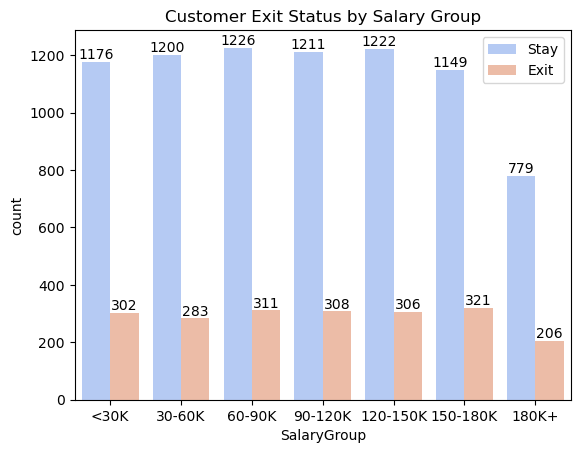

In [28]:
# create countplot
ax = sns.countplot(data= df3, x= 'SalaryGroup',hue='Exited',palette='coolwarm')

# adding value on the bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Customer Exit Status by Salary Group') 
plt.legend(labels=['Stay','Exit'])
plt.show()

From the perspective of salary groups, the numbers do not show a significantly large disparity. This is likely because the differences between the salary groups are relatively small, making the gap less pronounced.

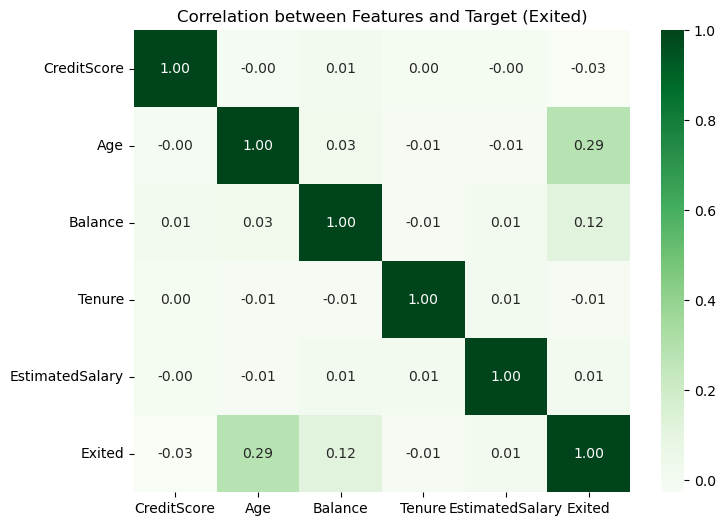

In [29]:
# crate correlation matrix
correlationmatrix = df[['CreditScore','Age','Balance','Tenure','EstimatedSalary','Exited']].corr()
# visualisasikan
plt.figure(figsize=(8, 6))
sns.heatmap(correlationmatrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation between Features and Target (Exited)')
plt.show()

The age shows a correlation of 0.29 with the Exited variable, while balances have a correlation of 0.12. These correlations suggest that age has a stronger relationship with customer churn compared to balances. Given these insights, both columns could serve as important predictors and are likely to be utilized in our machine learning model for predicting customer churn.

Other correlation indicators can be observed in the figure above. These provide additional insights into how different features relate to the target variable. Analyzing these correlations will help us identify which features are most relevant and should be prioritized for inclusion in our machine learning model, ultimately improving its predictive power.

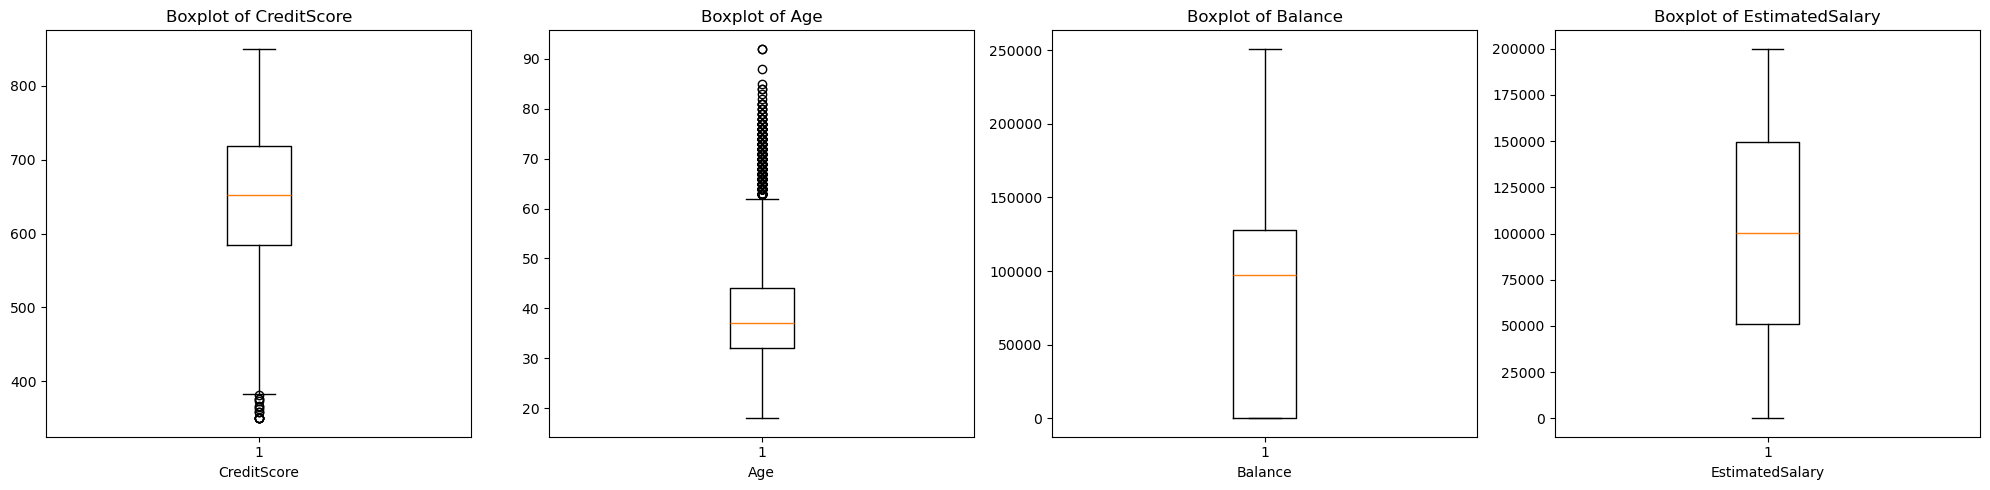

In [30]:
selected_cols= ['CreditScore','Age','Balance','EstimatedSalary']
def plot_selected_boxplots(df, selected_cols):
    """
    Membuat boxplot untuk kolom numerik yang dipilih dari DataFrame.
    """
    # Pastikan kolom yang dipilih adalah numerik
    numeric_cols = [col for col in selected_cols if df[col].dtype in ['int64', 'float64']]
    
    # Tentukan jumlah kolom per baris
    cols_per_row = 4
    
    # Hitung jumlah baris yang diperlukan
    num_rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row
    
    # Tentukan ukuran figure, di mana setiap subplot memiliki ukuran tertentu
    plt.figure(figsize=(cols_per_row * 5, num_rows * 5))
    
    # Loop melalui setiap kolom numerik dan buat boxplot
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, cols_per_row, i)
        plt.boxplot(df[col].dropna(), vert=True)
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
    
    # Sesuaikan layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Tampilkan plot
    plt.show()

# Contoh penggunaan:
selected_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# df = pd.read_csv('your_data.csv')  # Muat data terlebih dahulu
plot_selected_boxplots(df, selected_cols)


We generated a box plot to gain a quick visual overview of the data distribution and detect any outliers. It is clear from the plot that significant outliers remain in the 'Age' and 'Credit Score' columns. These outliers could potentially skew our analysis or model predictions, so further investigation or treatment, such as capping or transforming the data, may be necessary to ensure more robust model performance.

### EDA RECAP

1. we have 20% churn customers. 
2. France has become our largest customer base.
3. Germany has the highest proportion of churned customers after the churn percentage is calculated based on the total number of customers in Germany.
4. Overall, the average credit score across the three countries is relatively similar.
5. Germany has the highest average account balance. 
6. Further investigation is needed into customer behavior in Germany, as the data shows they maintain higher average balances compared to other countries, yet they exhibit a higher tendency to churn.
7. In general, most of our customers only use one service or, at most, two of our services. It is important to improve this by encouraging them to adopt additional services.
8. In terms of percentage, the dataset shows a similar proportion of active and inactive users. However, the majority of churn comes from inactive users.
9. 70% of our customers are credit card holders. However, 14% of our customers not only hold a credit card but have also churned. This indicates that a significant portion of churn comes from credit card holders.
10. The age group of 40-50 years old represents the largest proportion of our customers who have churned from our services.
11. Our analysis reveals three major groups when examining the relationship between churn and balance: the 0 Balance group, the 1-100K group, and the 100K+ group. Among these, the 100K+ group dominates, accounting for 60% of the total churn. This highlights that customers with higher balances are more likely to churn compared to those in the other two groups.
12. After conducting the correlation test, it has been shown that age and balance do have a correlation with churn. While the correlation is not particularly strong, these features can still be valuable inputs for our machine learning model.

## V. Feature Engineering

This section will cover feature engineering and conclude by identifying the features to be used as parameters in the model. It is important to note that the term "feature" is synonymous with "column" in this context.

### Cardinality Check

In [31]:
# check cardinality
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(),df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Surname,2932,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Bartlett, Obinna, He, H?, Bearce, Andrews, Kay, Chin, Scott, Goforth, Romeo, Henderson, Muldrow, Hao, McDonald, Dellucci, Gerasimov, Mosman, Yen, Maclean, Young, Nebechi, McWilliams, Lucciano, Azikiwe, Odinakachukwu, Sanderson, Maggard, Clements, Lombardo, Watson, Lorenzo, Armstrong, Cameron, Hsiao, Clarke, Osborne, Lavine, Bianchi, Tyler, Martin, Okagbue, Yin, Buccho, Chidiebele, Trevisani, O'Brien, Parkhill, Yoo, Phillipps, Tsao, Endrizzi, T'ien, Velazquez, Hunter, Clark, Jeffrey, Pirozzi, Jackson, Hammond, Brownless, Chibugo, Glauert, Pisano, Konovalova, McKee, Palermo, Ballard, Wallace, Cavenagh, Hu, Read, Bushell, Postle, Buley, Leonard, Mills, Onyeorulu, Beit, Ndukaku, Gant, Rowley, Sharpe, Heap, Ritchie, Cole, Capon, Fiorentini, Graham, Yuille, Allard, Fanucci, Fu, Hung, ...]"
1,Geography,3,"[France, Spain, Germany]"
2,Gender,2,"[Female, Male]"


Feature surname has the highest amount of cardinality. We can exclude this feature and use the geography and gender feature. It will be useful to get feature with the low cardinality, because if we use feature with the high cardinality. there will be a curse of dimensionality. 

### Splitting Between X Feature and y Target

In [32]:
#Splitting between X and Y

X = df.drop(['Exited'], axis = 1)
y = df['Exited']
X.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9194,15640106,Mason,613,France,Male,40,7,124339.90,1,0,0,193309.58
2430,15689351,Johnson,742,Germany,Female,41,4,92805.72,1,0,1,73743.95
6831,15696989,Chukwueloka,469,Germany,Female,52,8,139493.25,3,0,0,150093.32
6874,15793883,Lo Duca,798,France,Male,28,3,0.00,2,1,0,2305.27
9735,15768495,Chidimma,700,France,Female,32,8,110923.15,2,1,1,161845.81


This is the column example. Feature Exited has been classified as a target.

In [33]:
# Drop High Cardinality Data 
X.drop(['CustomerId','Surname'],axis=1,inplace=True)
X.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2400,711,Germany,Male,34,4,133467.77,2,1,1,42976.64


In this section, we have removed high cardinality features. Consequently, both the Surname and CustomerID features have been completely eliminated from the dataset.

### Split Train dan Test Set

In [34]:
# Split between train set and test set
# Test set 20% train 80%
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size= 0.2, random_state = 5)

# Tampilkan
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)
X_train.sample(1)

Train Size (8000, 10)
Test Size (2000, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3394,466,France,Male,29,6,0.0,2,1,1,2797.27


Data has been separated between train set and test set.

### Cek Missing Value

In [35]:
# cek missing value
X_train.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

However we still have to check missing value in this section again to ensure and the missing value off all the feature is 0.

### Outlier Handling 

Outlier is considered noise in the data, that is we have to removed from the dataset. 

In [36]:
#check distribution form skewness
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,CreditScore,-0.1,normal
1,Age,1.0,skewed
2,Tenure,0.0,normal
3,Balance,-0.1,normal
4,NumOfProducts,0.7,skewed
5,HasCrCard,-0.9,skewed
6,IsActiveMember,-0.0,normal
7,EstimatedSalary,-0.0,normal


Columns (Age,NumOfProducts, HasCrCard) are the skewed column. In skew data distribution the outlier is sometimes exist. We check in all of this distribution. 

In [37]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X[col].quantile(0.75) - X[col].quantile(0.25)
    lower_boundary = X[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X[col].mean() - 3* X[col].std()
    upper_boundary = X[col].mean() + 3* X[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X[X[col] > upper_boundary]) / len(X) * 100) + (len(X[X[col] < lower_boundary]) / len(X) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,CreditScore,940.49,360.57,0.08
1,Age,80.00,-4.00,0.12
2,Tenure,13.69,-3.66,0.00
3,Balance,263678.10,-110706.33,0.00
4,NumOfProducts,5.00,-2.00,0.00
5,HasCrCard,4.00,-3.00,0.00
6,IsActiveMember,2.01,-0.98,0.00
7,EstimatedSalary,272621.72,-72441.24,0.00


After reviewing the data, we identified that outliers are present only in the Credit Score and Age columns. It is essential to address these outliers effectively.

We prefer to transform the outliers into a range that remains within the acceptable limits (inliers) rather than simply deleting them. This way, we can retain valuable data while mitigating the impact of extreme values. By transforming these outliers, we ensure that the dataset remains robust for analysis, preserving the integrity of the information without losing critical insights.

We use winsorizer library in this program. 

In [38]:
#check 
X_train['CreditScore'].min()

350

Check the lowest amount in Credit Score

In [39]:
# Capping menggunakan Library Winsorizer
windsoriser = Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=3,
                          variables=['CreditScore'])

windsoriser.fit(X_train)

# ditransform
X_train_capped = windsoriser.transform(X_train)
#check 
X_train_capped['CreditScore'].min()

360.03687927870794

After applying the Winsorizer with a parameter of 3 standard deviations due to the assumption of normal distribution, we observed a minimal change in values, with the lower limit adjusting from 350 to 360.

In [40]:
# check
X_train_capped['Age'].max()

92

check maximal number

In [41]:
# Capping menggunakan Library Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=3,
                          variables=['Age'])

windsoriser.fit(X_train_capped)

# ditransform
X_train_capped = windsoriser.transform(X_train_capped)
#check 
X_train_capped['Age'].max()

80

In this section, we utilized the Interquartile Range (IQR) method to handle the skewed data distribution. As a result, the maximum age in the dataset is now capped at 80.

### Split Categorical and Numerical Column

In [42]:
# categorical check on numerical data type
num_col_cek = X.select_dtypes(include = np.number).columns.tolist()
print(num_col_cek)
for i in num_col_cek : 
    cek_uniq= X[i].nunique()
    print(cek_uniq)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
460
70
11
6382
4
2
2
9999


'NumOfProducts', 'HasCrCard', 'IsActiveMember' are categorical number therefore we should move it to categorical /

In [43]:
# splitting the feature name manually. 
numerical = ['CreditScore', 'Age','Tenure','Balance','EstimatedSalary']
cat_nom = ['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [44]:
# define every variable in case needed

X_train_cat = X_train_capped[cat_nom]
X_test_cat = X_test[cat_nom]

X_train_num = X_train_capped[numerical]
X_test_num = X_test[numerical]

### Feature Selection

There are various methods for feature selection in machine learning. In this program, we will utilize correlation as a key parameter. Features that exhibit a correlation with the target variable will be selected for inclusion in the model.



In [45]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('Correlated')
  else :
    interpretasi.append('No Correlation')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,Geography,Correlated
1,Gender,Correlated
2,NumOfProducts,Correlated
3,HasCrCard,No Correlation
4,IsActiveMember,Correlated


Feature HasCrCard has no correlation. We do not pick this feature.

In [46]:
# Drop HasCrCard
X_train_capped.drop(columns=['HasCrCard'], inplace=True)
X_test.drop(columns=['HasCrCard'], inplace=True)
X_train_capped.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
7751,750.0,Spain,Female,39,6,0.0,2,0,19264.33


Column HasCrCard has been removed 

In [47]:
# Feature selection Numerical columns

#nama kolom
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,CreditScore,ada korelasi
1,Age,ada korelasi
2,Tenure,ga ada korelasi
3,Balance,ada korelasi
4,EstimatedSalary,ga ada korelasi


Column Teanure and EstimatedSalary is uncorrelated with the target. Then we drop these. 

In [48]:
# Drop Tenure and Estimated Salary
X_train_capped.drop(columns=['Tenure','EstimatedSalary'], inplace=True)
X_test.drop(columns=['Tenure','EstimatedSalary'], inplace=True)
X_train_capped.head(1)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
7751,750.0,Spain,Female,39,0.0,2,0


In [49]:
X_train_capped.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

These all of our Feature will be used in the machine learning model as feature parameter. 

### PipeLine Preprocessing

In [50]:
# definisikan ulang nama cat_nom
cat_nom = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember']
numerical = ['CreditScore', 'Age', 'Balance']

New variable column has been created this is for pipeline. 

In [51]:
# Create Pipeline
categorikal_pipeline = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder_o',OneHotEncoder())])
numerikal_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),('encoder_num',StandardScaler())])

We are creating a pipeline that employs One Hot Encoding for categorical features. For numerical features, we will use Standard Scaler to standardize the data. Additionally, we will implement a Simple Imputer strategy, using the mode for categorical data and the mean for numerical data.

In [52]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('categorikal',categorikal_pipeline,cat_nom),
     ('numerikal',numerikal_pipeline,numerical)])

Concat both pipeline with the Column Transformer

In [53]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

From the data regarding exited or churned customers and those who did not churn, it is clear that the dataset is imbalanced. We are using SMOTENC here to create a sample dummy dataset to make the dataset more balanced.

In [54]:
# SMOTENC over-sampler
smotenc = SMOTENC(categorical_features=[0, 1, 2, 3], random_state=42)

Smotenc has been added.

## VI. Model Definition

### Conceptual Question 

####  Latar belakang adanya bagging dan cara kerja bagging

Bagging (Bootstrap Aggregating) adalah salah satu teknik ensemble dalam machine learning yang bertujuan untuk mengurangi variance dan meningkatkan performa model. Teknik ini dikembangkan sebagai solusi untuk mengatasi masalah overfitting pada model yang memiliki high variance, seperti pohon keputusan (decision tree).

Jadi kita mengombinasikan banyak model dalam algoritma. Kita buat model yang banyak ditentukan oleh estimator. Setelah itu kita memberikan model sampel acak dari data set. sampel acak tersebut biasanya kurang dari total data set. Misal total data set 10K maka setiap model dapat 1K sample as a contoh saja. 

Setelah memiliki beberapa subset data, model yang sama (misalnya, decision tree) dilatih di masing-masing subset. Hasilnya adalah banyak model yang berbeda karena mereka dilatih pada data yang berbeda.

Setelah semua model dilatih, prediksi akhir diperoleh dengan menggabungkan hasil prediksi dari semua model. Dalam kasus regresi, rata-rata prediksi dari semua model digunakan. Sementara dalam klasifikasi, prediksi diambil berdasarkan mayoritas voting. Jadi ada perbedaan pengambilan keputusan akhir pada kasus regresi dan klasifikasi, namun poinnya dari semua model kita menggunakan banyak penilaian parameter dari banyak model juga kemudian diambil rata-rata atau mayoritas vote.

Dengan cara ini, bagging mengurangi variance dari model, karena gabungan beberapa model cenderung lebih stabil dan kurang overfitting dibandingkan satu model yang dilatih pada seluruh dataset. Algoritma populer yang menggunakan bagging adalah Random Forest, di mana bagging diterapkan pada decision trees. 

In case jika ingin memahami buka link [youtube](https://www.youtube.com/watch?v=KIOeZ5cFZ50)

#### Perbedaan Cara Kerja Algoritma Random Forest dengan algoritma boosting yang Anda pilih

Random forest itu membuat sekian n model dan kemudian kita memberikan rata2 atau majority voting dari model tersebut. Berbeda dengan boosting model yang saya pilih. 

Kasus saya. saya memilih decision tree sebagai estimator awal dan kemudian menggunakan ada boosting. 

dalam AdaBoost, biasanya yang digunakan adalah Decision Stump, yaitu pohon keputusan dengan kedalaman 1 (hanya satu split), sehingga pohon ini sangat sederhana dan merupakan "weak learner" (pembelajar lemah). Model kemudian mencoba predict dan dari hasil predict pasti ada misklasifikasi,dari misklasifikasi itu kemudian dinilai dan diberikan bobot untuk kemudian bisa lanjut ke model selanjutnya. terus sampai model ini memberikan yang terbaik. 

Langkah Pertama: Model pertama (stump) dilatih pada dataset penuh, memberikan prediksi untuk setiap sampel. Pada tahap ini, semua sampel memiliki bobot yang sama.

Misklasifikasi: Setelah model pertama terbentuk, AdaBoost mengevaluasi hasilnya. Sampel yang diklasifikasikan dengan benar akan mendapat bobot yang lebih kecil, sedangkan sampel yang salah klasifikasi akan diberikan bobot lebih besar. Artinya, baris-baris yang salah diklasifikasi akan diberi perhatian lebih dalam model berikutnya.

Pembobotan dan Model Berikutnya: Pada langkah selanjutnya, model kedua dilatih dengan mempertimbangkan bobot baru ini. Sampel yang salah diklasifikasikan di langkah sebelumnya akan menjadi lebih penting, sehingga model berikutnya berfokus untuk memperbaiki kesalahan pada sampel-sampel tersebut.

Pengulangan Proses: Proses ini terus diulang sampai semua model terbentuk (berdasarkan jumlah n_estimators), dengan bobot yang terus diperbarui di setiap langkah. Setiap model berusaha untuk memperbaiki kesalahan yang dilakukan oleh model sebelumnya.

Setelah beberapa model terbentuk, hasil akhirnya ditentukan berdasarkan kombinasi dari seluruh model. Pada klasifikasi, ini biasanya dilakukan dengan weighted majority voting, di mana model yang lebih baik mendapatkan bobot lebih besar dalam voting akhir.

Perbedaan signifikan adalah bahwa AdaBoost membangun model secara berurutan. Model kedua belajar dari model pertama, model ketiga belajar dari model kedua dan pertama, dan proses ini terus berlanjut hingga model terbaik tercapai.

Sementara itu, Random Forest membangun semua model (pohon keputusan) secara paralel (bersamaan). Random Forest mengambil rata-rata (atau voting mayoritas) dari semua prediksi model-model tersebut. Setiap skor model dihitung di akhir, dengan setiap sampel data diambil secara acak.

link pembelajaran kalau berkenan [youtube](https://www.youtube.com/watch?v=NLRO1-jp5F8&t=2s)

#### Cross Validation 

Cross-validation adalah teknik dalam machine learning yang digunakan untuk mengevaluasi performa model secara lebih andal dengan membagi dataset menjadi beberapa subset (folds), lalu melatih dan menguji model secara bergantian pada subset-subset tersebut. Tujuannya adalah untuk menghindari hasil evaluasi yang kebetulan baik hanya karena kebetulan dari pembagian data atau parameter tertentu, sehingga memberikan gambaran performa model yang lebih akurat.

Konsep utama dari cross-validation adalah memastikan bahwa model tidak hanya bekerja baik pada satu bagian data (seperti pada training set), misalnya dengan test set sebesar 20% di akhir, tetapi juga dapat menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya. Ini sangat penting untuk menghindari overfitting dan memastikan bahwa model dapat bekerja dengan baik pada data baru dan tak terlihat (data testing).

Catatan penting cross validasi hanya akan dilakukan di data train, tidak di data testing. 

Cross-validation pada testing tidak dilakukan karena data testing disimpan sebagai data terpisah yang hanya digunakan pada tahap akhir untuk mengevaluasi generalisasi model pada data baru. Jika cross-validation dilakukan pada data testing, itu bisa dianggap sebagai "leakage" atau model secara tidak langsung belajar dari data testing, sehingga hasil evaluasi tidak akan menggambarkan performa model yang sebenarnya di dunia nyata.

### Reasoning Model

Kita melihat dulu bagaimana kondisi dataset dan kondisinya waktu. Dataset berjumlah 10000 dan memiliki 7 kolom. Untuk dimensi kolom atau fitur berarti data ini tidak terlalu besar berarti cocok untuk dilatih dengan banyak model. 

Waktu yang kita dapatkan cukup padat dan singkat sekitar 1 minggu kemungkinan akan membuat model dengan sebanyak 6.
 
Model Logistic Regresion saya akan buat, karena model ini cenderung cepat dan bagus saja. (pertimbangan waktu)

Selanjutnya. Model Decision Tree dan Random Forest. Karena memang biasanya kasus Churn prediction menggunakan ini. [sumber](https://medium.com/@gayathri.s.de/machine-learning-cheat-sheets-b795a77916da)

Sebagai pembanding scoring saya akan buat model SVC dan KNN, siapa tau memang dataset ini lebih cocok dengan algoritma tersebut. 

saya akan coba boosting dengan ada boost untuk kasus Decision tree algoritma. 

Scoring akan tetap dengan recall sama seperti object di atas namun di setiap model akan ada scoring dengan cross validation, untuk memastikan bahwa setiap model memang mendapatkan hasil yang benar tidak ada kebetulan dalam model. 

## VII. Model Training

### Model Train Logistic Regression

In [55]:
# mencoba model dengan default
md_logreg = Pipeline([('preprosessing', preprocessor), ('smotenc', smotenc),('logreg', LogisticRegression(random_state=19))])

Model Logistic Regresion telah berhasil di definisikan kita akan predict di bagian evaluasi saja

In [56]:
md_logreg.fit(X_train_capped,y_train)

Pipeline(steps=[('preprosessing',
                 ColumnTransformer(transformers=[('categorikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_o',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender',
                                                   'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('numerikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder_num',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance'])])),
                ('smotenc',
                 SMOTENC(categorical_features=[0, 1, 2, 3], random_state=42)),
                ('logreg', LogisticRegression(random_state=19))])

Model Logistic Regression telah berhasil dilatih

### Model Train KNN

In [57]:
# model knn default
# Training using KNN
md_knn = Pipeline([('preprosessing', preprocessor), ('smotenc', smotenc),('knn', KNeighborsClassifier(n_neighbors=3))]) 


Model knn berhasil dibuat


In [58]:
# train knn model
md_knn.fit(X_train_capped,y_train)

Pipeline(steps=[('preprosessing',
                 ColumnTransformer(transformers=[('categorikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_o',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender',
                                                   'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('numerikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder_num',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance'])])),
                ('smotenc',
                 SMOTENC(categorical_features=[0, 1, 2, 3], random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Model berhasil ditraining

### Model Train SVC

In [59]:
# model svc default
# Training using svc
md_svc = Pipeline([('preprosessing', preprocessor), ('smotenc', smotenc),('svc', SVC(kernel='linear',random_state= 19))]) 

Model svc berhasil dibuat

In [60]:
# train svc model
md_svc.fit(X_train_capped,y_train)

Pipeline(steps=[('preprosessing',
                 ColumnTransformer(transformers=[('categorikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_o',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender',
                                                   'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('numerikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder_num',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance'])])),
                ('smotenc',
                 SMOTENC(categorical_features=[0, 1, 2, 3], random_state=42)),
                ('svc', SVC(kernel='linear', random_state=19))])

Model Svc berhasil ditrain

### Model Training Decision Tree

In [61]:
# model decision tree default
# Training using decision tree
md_dt = Pipeline([('preprosessing', preprocessor), ('smotenc', smotenc),('svc', DecisionTreeClassifier(max_depth=6, random_state=19))]) 

Model Decision Tree berhasil dibuat

In [62]:
# train dt model
md_dt.fit(X_train_capped,y_train)

Pipeline(steps=[('preprosessing',
                 ColumnTransformer(transformers=[('categorikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_o',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender',
                                                   'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('numerikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder_num',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance'])])),
                ('smotenc',
                 SMOTENC(categorical_features=[0, 1, 2, 3], random_state=42)),
                ('svc', DecisionTreeClassifier(max_depth=6, random_state=19))])

Model Decision Tree berhasil ditrain

### Model Training Random Forest

In [63]:
# Training using random forest
# max depth uses 5 as a random guess to prevent overfitting
md_rf = Pipeline([('preprosessing', preprocessor), ('smotenc', smotenc),('rf', RandomForestClassifier(n_estimators=100,max_depth=5,random_state=19)
)]) 

Model Random forest dibuat

In [64]:
# train dt model
md_rf.fit(X_train_capped,y_train)

Pipeline(steps=[('preprosessing',
                 ColumnTransformer(transformers=[('categorikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_o',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender',
                                                   'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('numerikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder_num',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance'])])),
                ('smotenc',
                 SMOTENC(categorical_features=[0, 1, 2, 3], random_state=42)),
                ('rf', RandomForestClassifier(max_depth=5, random_state=19))])

Model di train

### Model Training AdaBoost

In [65]:
# Training using ada boost
md_ada = Pipeline([('preprosessing', preprocessor), ('smotenc', smotenc),('ada',
            AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=6),  # Default estimator is Decision Tree Stump
        n_estimators=50,  # Default is 50 estimators
        random_state=19))
]) 

Model berhasil dibuat

In [66]:
# train dt model
md_ada.fit(X_train_capped,y_train)

c:\Users\asanm\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprosessing',
                 ColumnTransformer(transformers=[('categorikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_o',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender',
                                                   'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('numerikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder_num',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance'])])),
                ('smotenc',
                 SMOTENC(categorical_features=[0, 1, 2, 3], random_state=42)),
                ('ada',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                                    random_state=19))])

Model telah di train

## VIII. Model Evaluation

Model evaluasi merupakan bab yang akan membahas bagaimana program atau model ini akan diberikan penilaian. Disini akan diberikan penilaian Recall Precision dan Accuracy. 

In [67]:
# create evaluation result
eval_results = {
    'name': [],
    'Recall - Train': [],
    'Recall - Test': [],
    'Precision - Train': [],
    'Precision - Test': [],
    'Accuracy - Train': [],
    'Accuracy - Test': []
}

def model_evaluation(name, model, X_train, X_test, y_train, y_test):
  # Predict Train-Set and Test-Set
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Model evaluation using different metrics
  recall_train = recall_score(y_train, y_pred_train)
  recall_test = recall_score(y_test, y_pred_test)

  precision_train = precision_score(y_train, y_pred_train)
  precision_test = precision_score(y_test, y_pred_test)

  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_test = accuracy_score(y_test, y_pred_test)


  # Save into dictionary
  eval_results['name'].append(name)
  eval_results['Recall - Train'].append(round(recall_train, 5))
  eval_results['Recall - Test'].append(round(recall_test, 5))
  eval_results['Precision - Train'].append(round(precision_train, 5))
  eval_results['Precision - Test'].append(round(precision_test, 5))
  eval_results['Accuracy - Train'].append(round(accuracy_train, 5))
  eval_results['Accuracy - Test'].append(round(accuracy_test, 5))
  

### Evaluation per Model

#### Logistic Regression Evaluation

In [68]:
# model logistic regression predict
y_pred_logreg_train = md_logreg.predict(X_train_capped)
y_pred_logreg_test = md_logreg.predict(X_test)

Membuat prediksi untuk evaluasi Logistic Regression

In [69]:
# model scoring
recall_train_logreg = recall_score(y_train, y_pred_logreg_train)
recall_test_logreg = recall_score(y_test, y_pred_logreg_test)

print('Nilai recall Pada Train', recall_train_logreg)
print('Nilai recall Pada Test', recall_test_logreg)


Nilai recall Pada Train 0.7291666666666666
Nilai recall Pada Test 0.7037037037037037


Pada Logistic Regression ini nilai scoring (recall) sekitar 72,9. Model yang cukup bagus karena model bisa memprediksi kasus Recall 72,9% menunjukkan bahwa model Anda berhasil mengidentifikasi 72,9% dari semua kasus positif yang sebenarnya (True Positive). Menyisakan 23 % pada kasus false negatif (Mesin prediksi bahwa customer akan tidak churn namun ternyata customer tersebut churn). Model sudah good fit  karena pada test juga menunjukkan nilai yang tidak kurang dari 5% dari nilai test. 

Sebagai informasi tambahan, penilaian kami disini menggunakan kasus recall 70% sudah kami anggap baik, ditambah lagi perbedaan antara test dan train tidak boleh gap nya lebih dari 5% itu model yang kami anggap good fit. 

In [70]:
# trying to cross validation
recall_train_cross_val_logreg = cross_val_score(md_logreg,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', recall_train_cross_val_logreg)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_logreg.mean())
print('Recall Std Cross Validation  : ', recall_train_cross_val_logreg.std())

Recall - All - Cross Validation  :  [0.71875    0.71691176 0.71139706]
Recall - Mean - Cross Validation :  0.7156862745098039
Recall Std Cross Validation  :  0.0031243992117602737


Setelah kita cross validasi ternyata Memang rata-rata dari hasil recall di angka tidak jauh dari tersebut sekitar 71,5%. Dan training kita recall 73% pada model dan random acak sample dan testing kita, berarti tidak jauh. jadi, model memang sudah melakukan dengan baik scoring tidak terjadi secara kebetulan. Nilai ini ditunjukkan dengan 3 all cross validation itu dan juga rata-ratanya tidak jah dari 73 masih oke ini. Std cukup kecil jadi variasi eror data masih berimbang di angka 71%

In [71]:
# create evaluation result dictionary
eval_results_crosval = {
    'name': [],
    'Recall_Mean_CV - Train': []
}

def model_crosval_evaluation (name,recall_train_variable):
    eval_results_crosval['name'].append(name)
    eval_results_crosval['Recall_Mean_CV - Train'].append(recall_train_variable.mean())

Kita masukin ke dataframe untuk menyimpan dan membandingkan dengan yang lain. Untuk kemudahan pembacaan kita baca saja dari recall. Untuk standard deviation tidak usah kita masukkan disini karena untuk kemudahan pembacaan dan penentuan akhir karena pada akhirnya kita membandingkan menggunakan recall yang sudah tervalidasi dan kita ambil rata-ratanya

In [72]:
model_crosval_evaluation("Logistic_Regression",recall_train_cross_val_logreg)
#visualize the dataframe
model_crosval_evaluation_df = pd.DataFrame(eval_results_crosval)
model_crosval_evaluation_df.set_index('name').T

name,Logistic_Regression
Recall_Mean_CV - Train,0.715686


In [73]:
# call the model evaluation formula
model_evaluation('Logistic_Regression',md_logreg,X_train_capped,X_test,y_train,y_test)
#visualize the dataframe
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Logistic_Regression
Recall - Train,0.72917
Recall - Test,0.70370
Precision - Train,0.47222
Precision - Test,0.45238
Accuracy - Train,0.77850
Accuracy - Test,0.76750


Kita pertimbangkan scoring dengan penilaian lain seperti accuracy dan precision. Accuracy seberapa bagus model memprediksi dengan kasus true positif dan true negatif. Sedangkan precision penilaian dengan pertimbangan false positif. Yang mana pelanggan diprediksi churn ternyata tidak churn. 

Accuracy cukup bagus namun precision jelek karena memang adanya trade off dengan recall. Recall antara trade off dan precision memang sering terjadi, namun ini sepertinya karena oversampling yang kita gunakan menggunakan metode smote itu. Jadi cenderung kurang kepada kasus-kasus yang false positif (Precision).

#### KNN Evaluation

In [74]:
# model knn predict
y_pred_knn_train = md_knn.predict(X_train_capped)
y_pred_knn_test = md_knn.predict(X_test)

Prediksi model untuk kasus KNN. 

In [75]:
# model scoring knn
recall_train_knn = recall_score(y_train, y_pred_knn_train)
recall_test_knn = recall_score(y_test, y_pred_knn_test)

print('Recall score model knn Train', recall_train_knn)
print('Recall score model knn Test', recall_test_knn)

Recall score model knn Train 0.8927696078431373
Recall score model knn Test 0.6


Model berperforma bagus dengan recall 89%, kemungkinan kasus false negatif rendah namun ketika di test model hanya mampu memprediksi 0,6 (over fit) Baik di train kurang baik di test. Kita coba dengan cross validation untuk memastikan semmua. dan kita tarik kesimpulan dari cross validation.

In [76]:
# trying to cross validation
recall_train_cross_val_knn = cross_val_score(md_knn,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', recall_train_cross_val_knn)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_knn.mean())
print('Recall Std Cross Validation  : ', recall_train_cross_val_knn.std())

Recall - All - Cross Validation  :  [0.61029412 0.62316176 0.62316176]
Recall - Mean - Cross Validation :  0.6188725490196078
Recall Std Cross Validation  :  0.006065866995472812


Nah disini kita mencoba cross validation. Ternyata setelah di cross validation model hanya bagus di data set train itu saja, ketika pola dataset lain dicoba model tidak bisa menggeneralisasi. Scoring recall train setelah cros val ini mirip dengan score pada di data testing. Jadi memang model ini kurang cocok menggunakan knn. Karena kita disini memang digunakan hanya untuk cek ombak apakah bisa ternyata tidak, dan ternyata kesimpulan model knn cenderung kurang cocok. Penilaian recall disini ini menujukkan hal tersebut. Std 0,006 menunjukkan bahwa memang nilai recall itu tidak jauh dari angka itu. 

In [77]:
# save to dataframe scoring
model_crosval_evaluation("KNN",recall_train_cross_val_knn)
#visualize the dataframe
model_crosval_evaluation_df = pd.DataFrame(eval_results_crosval)
model_crosval_evaluation_df.set_index('name').T

name,Logistic_Regression,KNN
Recall_Mean_CV - Train,0.715686,0.618873


Masukkan ke dataframe untuk kemudahan perbandingan.

In [78]:
# call the model evaluation formula
model_evaluation('KNN',md_knn,X_train_capped,X_test,y_train,y_test)
#visualize the dataframe
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Logistic_Regression,KNN
Recall - Train,0.72917,0.89277
Recall - Test,0.70370,0.60000
Precision - Train,0.47222,0.69085
Precision - Test,0.45238,0.44669
Accuracy - Train,0.77850,0.89663
Accuracy - Test,0.76750,0.76850


Model disini overfit pada kasus KNN. Bahkan ketika di cross validasi awal performa sudah turun yang menunjukkan bahwa benar2 kasus ini over fit. Kita lihat dengan penilaian elemen lain juga masih menunjukkan bahwa model overfit. KNN disini tertolak untuk dipakai. 

#### SVC Evaluation

In [79]:
# model svc predict
y_pred_svc_train = md_svc.predict(X_train_capped)
y_pred_svc_test = md_svc.predict(X_test)

Mencoba prediksi model dengan svc. 

In [80]:
# model scoring svc
recall_train_svc= recall_score(y_train, y_pred_svc_train)
recall_test_svc = recall_score(y_test, y_pred_svc_test)

print('Recall score model svc Train', recall_train_svc)
print('Recall score model svc Test', recall_test_svc)

Recall score model svc Train 0.7303921568627451
Recall score model svc Test 0.7111111111111111


Model Good fit dan recall itu di angka 73 pada train dan test pada 71. saya disini menganggap model cukup bagus. Kita cek di cross validation untuk memberikan kepastian apakah nilai ini terjadi secara kebetulan atau benar.


In [81]:
# trying to cross validation
recall_train_cross_val_svc = cross_val_score(md_svc,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', recall_train_cross_val_svc)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_svc.mean())
print('Recall Std Cross Validation  : ', recall_train_cross_val_svc.std())

Recall - All - Cross Validation  :  [0.69852941 0.72426471 0.70772059]
Recall - Mean - Cross Validation :  0.7101715686274511
Recall Std Cross Validation  :  0.01064837450795513


Rata-rata setelah Cross validation mean recall di angka 71. Performa turun 2 point,namun di std recallnya masih kecil berarti nilai tidak goyang dari angka rata-rata itu. Pun jika goyah akan nambah atau minus 1% saja. Ditunjukkan dari std . Model ini kurang dibandingkan dengan model logistic regresion. 

In [82]:
# save to dataframe scoring
model_crosval_evaluation("SVC",recall_train_cross_val_svc)
#visualize the dataframe
model_crosval_evaluation_df = pd.DataFrame(eval_results_crosval)
model_crosval_evaluation_df.set_index('name').T

name,Logistic_Regression,KNN,SVC
Recall_Mean_CV - Train,0.715686,0.618873,0.710172


Masukkan ke data frame untuk perbandingan.

In [83]:
# call the model evaluation formula
model_evaluation('SVC',md_svc,X_train_capped,X_test,y_train,y_test)
#visualize the dataframe
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Logistic_Regression,KNN,SVC
Recall - Train,0.72917,0.89277,0.73039
Recall - Test,0.70370,0.60000,0.71111
Precision - Train,0.47222,0.69085,0.47115
Precision - Test,0.45238,0.44669,0.45212
Accuracy - Train,0.77850,0.89663,0.77775
Accuracy - Test,0.76750,0.76850,0.76700


Accuracy dan menunjukkan masih tinggi. di atas 70 dan recall 73. Model masih good fit. namun kita menggunakan recall mean cross validation untuk memilih model mana yang terbaik . Dan sampai saat ini  ternyata Logreg masih menjadi pilihan yang lebih baik dibanding model yang lain. 

#### Decision Tree Evaluation

In [84]:
# model dt predict
y_pred_dt_train = md_dt.predict(X_train_capped)
y_pred_dt_test = md_dt.predict(X_test)

Predict Decision tree

In [85]:
# model scoring dt
recall_train_dt= recall_score(y_train, y_pred_dt_train)
recall_test_dt = recall_score(y_test, y_pred_dt_test)

print('Recall score model svc Train', recall_train_dt)
print('Recall score model svc Test', recall_test_dt)

Recall score model svc Train 0.7395833333333334
Recall score model svc Test 0.6839506172839506


Nilai recall 74. Lebih baik dibandingkan Logreg. Namun model mendekati ovefit disini. Pada score test svc menujukkan perbedaan hampir lebih dari 5%. Model belajar baik di training ketika di testing kesalahan model lebih dari gap 5% itu. Untuk kepastian kita coba lihat di cros validation. 

In [86]:
# trying to cross validation
recall_train_cross_val_dt = cross_val_score(md_dt,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', recall_train_cross_val_dt)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_dt.mean())
print('Recall Std Cross Validation  : ', recall_train_cross_val_dt.std())

Recall - All - Cross Validation  :  [0.68933824 0.71323529 0.73345588]
Recall - Mean - Cross Validation :  0.7120098039215685
Recall Std Cross Validation  :  0.018031787952894788


Ternyata model tidak over fit, model good fit, namun angka di atas merupakan angka kebetulan. score recall rata-rata masih di angka 71,2 % yang berarti model logistic regresion masih memimpin. Angka 74% tadi merupakan angka kebetulan. Dan dikonfirmasi di std ternyata memang memungkinkan angka ini bisa nambah menjadi 2. karena variasinya masih menunjukkan angka 2% di std. 

In [87]:
# save to dataframe scoring
model_crosval_evaluation("DT",recall_train_cross_val_dt)
#visualize the dataframe
model_crosval_evaluation_df = pd.DataFrame(eval_results_crosval)
model_crosval_evaluation_df.set_index('name').T

name,Logistic_Regression,KNN,SVC,DT
Recall_Mean_CV - Train,0.715686,0.618873,0.710172,0.71201


Terlihat disini pilihan terbaik masih model Logreg dengan 71,5 % recall test. 

In [88]:
# call the model evaluation formula
model_evaluation('DT',md_dt,X_train_capped,X_test,y_train,y_test)
#visualize the dataframe
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Logistic_Regression,KNN,SVC,DT
Recall - Train,0.72917,0.89277,0.73039,0.73958
Recall - Test,0.70370,0.60000,0.71111,0.68395
Precision - Train,0.47222,0.69085,0.47115,0.51471
Precision - Test,0.45238,0.44669,0.45212,0.47841
Accuracy - Train,0.77850,0.89663,0.77775,0.80463
Accuracy - Test,0.76750,0.76850,0.76700,0.78500


Keunggulan DT ini ternyata akurasi nya menunjukkan good fit dan angka nya merupakan angka tertinggi dibandingkan angka yang lain. 

#### Random Forest Evaluation

In [89]:
# model dt predict
y_pred_rf_train = md_rf.predict(X_train_capped)
y_pred_rf_test = md_rf.predict(X_test)

Random forest prediction

In [90]:
# model scoring dt
recall_train_rf= recall_score(y_train, y_pred_rf_train)
recall_test_rf = recall_score(y_test, y_pred_rf_test)

print('Recall score model svc Train', recall_train_rf)
print('Recall score model svc Test', recall_test_rf)

Recall score model svc Train 0.75
Recall score model svc Test 0.7407407407407407


Model good fit, score paling tinggi dari model model lain. namun kita pastikan apakah ini benar atau hanya angka kebetulan.

In [91]:
# trying to cross validation
recall_train_cross_val_rf = cross_val_score(md_rf,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', recall_train_cross_val_rf)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_rf.mean())
print('Recall Std Cross Validation  : ', recall_train_cross_val_rf.std())

Recall - All - Cross Validation  :  [0.70036765 0.76102941 0.72058824]
Recall - Mean - Cross Validation :  0.7273284313725491
Recall Std Cross Validation  :  0.025219504445167497


Model di rata2 dengan sistem Cros validasi. Ternyata memang rata-rata 0,727 tapi variasinya masih 2% jadi masih ada kemungkinan hasil recall di titik2 tertentu itu menghasilkan score recall tertinggi. Terbukti ada scoring masih 76% atau 70% di hasil dari ALL cross validation. 

In [92]:
# save to dataframe scoring
model_crosval_evaluation("RF",recall_train_cross_val_rf)
#visualize the dataframe
model_crosval_evaluation_df = pd.DataFrame(eval_results_crosval)
model_crosval_evaluation_df.set_index('name').T

name,Logistic_Regression,KNN,SVC,DT,RF
Recall_Mean_CV - Train,0.715686,0.618873,0.710172,0.71201,0.727328


Model RF menjadi sorotan utama. Karena model berhasil membuat score recall tertinggi setelah di cross validation. Jadi sampai sekarang pilihan cenderung ke arah RF. 

In [93]:
# call the model evaluation formula
model_evaluation('RF',md_rf,X_train_capped,X_test,y_train,y_test)
#visualize the dataframe
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Logistic_Regression,KNN,SVC,DT,RF
Recall - Train,0.72917,0.89277,0.73039,0.73958,0.75000
Recall - Test,0.70370,0.60000,0.71111,0.68395,0.74074
Precision - Train,0.47222,0.69085,0.47115,0.51471,0.51364
Precision - Test,0.45238,0.44669,0.45212,0.47841,0.48940
Accuracy - Train,0.77850,0.89663,0.77775,0.80463,0.80412
Accuracy - Test,0.76750,0.76850,0.76700,0.78500,0.79100


Ternyata model rf menujukkan accuract tertinggi dan performa masih good fit kita lanjutkan ke Ada Boost Evaluation. 

#### Ada Boost Evaluation

In [94]:
# model dt predict
y_pred_ada_train = md_ada.predict(X_train_capped)
y_pred_ada_test = md_ada.predict(X_test)

Model telah melakukan predict. 

In [95]:
# model scoring dt
recall_train_ada= recall_score(y_train, y_pred_ada_train)
recall_test_ada = recall_score(y_test, y_pred_ada_test)

print('Recall score model svc Train', recall_train_ada)
print('Recall score model svc Test', recall_test_ada)

Recall score model svc Train 0.9387254901960784
Recall score model svc Test 0.528395061728395


Model cenderung overfit. Karena model hanya bisa mendeteksi pada train tidak bisa mendeteksi pada test. Kita lihat pada cross validation

In [96]:
# trying to cross validation
recall_train_cross_val_ada = cross_val_score(md_ada,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', recall_train_cross_val_ada)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_ada.mean())
print('Recall Std Cross Validation  : ', recall_train_cross_val_ada.std())

c:\Users\asanm\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\asanm\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\asanm\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Recall - All - Cross Validation  :  [0.51286765 0.51102941 0.52757353]
Recall - Mean - Cross Validation :  0.5171568627450981
Recall Std Cross Validation  :  0.007403827189702583


Setelah di cross validation, memang model cenderung overfit dan tidak bagus untuk dipakai. Recall hanya di angka 51%  model hanya bisa belajar di train set. Ketika di cross validasi mengganti dengan train set sample maka model tidak bisa melakukan dengan benar. 


In [97]:
# save to dataframe scoring
model_crosval_evaluation("ada_boost",recall_train_cross_val_ada)
#visualize the dataframe
model_crosval_evaluation_df = pd.DataFrame(eval_results_crosval)
model_crosval_evaluation_df.set_index('name').T

name,Logistic_Regression,KNN,SVC,DT,RF,ada_boost
Recall_Mean_CV - Train,0.715686,0.618873,0.710172,0.71201,0.727328,0.517157


Tetap pilihan terbaik pada model RF dengan score 72,7% ini model akan kita tuning untuk mendapatkan parameter terbaik. 

In [98]:
# call the model evaluation formula
model_evaluation('ada_boost',md_ada,X_train_capped,X_test,y_train,y_test)
#visualize the dataframe
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Logistic_Regression,KNN,SVC,DT,RF,ada_boost
Recall - Train,0.72917,0.89277,0.73039,0.73958,0.75000,0.93873
Recall - Test,0.70370,0.60000,0.71111,0.68395,0.74074,0.52840
Precision - Train,0.47222,0.69085,0.47115,0.51471,0.51364,0.96474
Precision - Test,0.45238,0.44669,0.45212,0.47841,0.48940,0.50831
Accuracy - Train,0.77850,0.89663,0.77775,0.80463,0.80412,0.98050
Accuracy - Test,0.76750,0.76850,0.76700,0.78500,0.79100,0.80100


Begini recap dari Performa seluruh model. Accuracy dan recall ada_boost memang bagus namun itu hanya berlaku pada training saja ketika menggunakan cros validasi performa menurun dengan signifikan. Model ini kurang cocok karena over fit. Random forest menjadi pilihan terbaik karena scoring tertinggi dan juga modiel menujukkan good fit di seluruh performa. Setelah ini kita akan hyper parameter tuning dengan parameter-parameter pilihan.

### Evaluation for Better Model 

recall_score - Test Set  :  0.7407407407407407 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1595
           1       0.49      0.74      0.59       405

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.84      0.79      0.81      2000
 

Confusion Matrix      : 


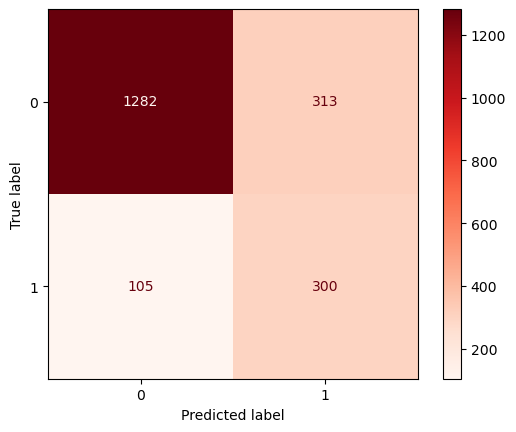

In [99]:
# RF detail report

print('recall_score - Test Set  : ', recall_test_rf, '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_rf_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(md_rf, X_test, y_test
, cmap='Reds'))

Recall untuk test pada kelas 1 adalah 0.74 (atau 74%). Ini berarti model mampu mengidentifikasi 74% dari semua kasus positif (kelas 1) yang sebenarnya ada di dataset. Meskipun demikian masih ada potensi untuk melakukan kesalahan false negativ sebesar 26%. 

Recall yang tinggi penting ketika kita ingin meminimalkan false negatives, yakni situasi di mana kasus yang sebenarnya positif (churn) tidak terdeteksi oleh model. Dengan recall sebesar 74%, model cukup baik dalam menangkap kasus churn, tetapi masih ada 26% kasus churn yang tidak terdeteksi oleh model (false negatives). 

Accuracy secara keseluruhan adalah 79%, tetapi seperti yang disebutkan sebelumnya, accuracy bisa menyesatkan ketika dataset tidak seimbang maka dari itu disini kita lebih cenderung untuk pemakaian recall saja. Dalam kasus ini, karena lebih banyak kelas 0 (non-churn), accuracy tinggi mungkin sebagian besar disumbangkan oleh kemampuan model dalam memprediksi kelas 0 dengan benar.
Jika kita hanya fokus pada kelas 1 (churn), maka recall dan precision menjadi metrik yang lebih relevan daripada sekadar accuracy. 

 Recall benar menunjukkan angka tinggi. Namun, trade-offnya adalah tingginya false positives, yang bisa menyebabkan pelanggan non-churn dianggap churn.Tapi harusnya tidak masalah karena fokus kita disini adalah mengurangi kasus churn di pelanggan kita. Terlihat kasus false positif diangka 313 pada data test kita. Apa efeknya untuk perusahaan. Perusahaan mungkin akan memberikan targeting marketing kepada orang yang salah. 

 Bagaimana di kasus ini? harusnya karena kita fokus untuk mengurangi churn, maka itu bisa saja tidak apa-apa yang penting tujuan kita churn rate bisa rendah tercapai.
Secara overall model sudah melakukan dengan baik dengan recall yang tinggi accuracy juga baik tapi tradeoffnya di precision. Tapi tidak masalah.

### Hyper Parameter Tuning

In [100]:
# Definisikan parameter grid untuk dituning
param_grid = {
    'rf__n_estimators': [100, 200, 300,50,40],
    'rf__max_depth': [None, 10, 20,5,3,4],
    'rf__min_samples_split': [2, 5, 10]
}

param_grid

{'rf__n_estimators': [100, 200, 300, 50, 40],
 'rf__max_depth': [None, 10, 20, 5, 3, 4],
 'rf__min_samples_split': [2, 5, 10]}

parameter ini digunakan untuk hyperparameter tuning

In [101]:
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=md_rf, param_grid=param_grid,
                           cv=3, scoring='recall', n_jobs=-1, verbose=2)

# Melakukan tuning hyperparameter pada Random Forest
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprosessing',
                                        ColumnTransformer(transformers=[('categorikal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder_o',
                                                                                          OneHotEncoder())]),
                                                                         ['Geography',
                                                                          'Gender',
                                                                          'NumOfProducts',
                                                                          'IsActiveMember']),
                                                                        ('numerikal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('encoder_num',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Balance'])])),
                                       ('smotenc',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      3],
                                                random_state=42)),
                                       ('rf',
                                        RandomForestClassifier(max_depth=5,
                                                               random_state=19))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 5, 3, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300, 50, 40]},
             scoring='recall', verbose=2)

Membuat total 270 model untuk memastikan mana yang lebih baik.

In [102]:
# Output parameter terbaik
grid_search.best_params_

{'rf__max_depth': 3, 'rf__min_samples_split': 2, 'rf__n_estimators': 40}

kita lihat dimana yang paling bagus. 

In [103]:
# Get Best Estimator

rf_best = grid_search.best_estimator_

Menyimpan model paling bagus di suatu variabel. 

Recall Score - Train Set   :  0.7990196078431373 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.68      0.79      6368
           1       0.39      0.80      0.53      1632

    accuracy                           0.71      8000
   macro avg       0.66      0.74      0.66      8000
weighted avg       0.82      0.71      0.73      8000
 

Confusion Matrix      : 


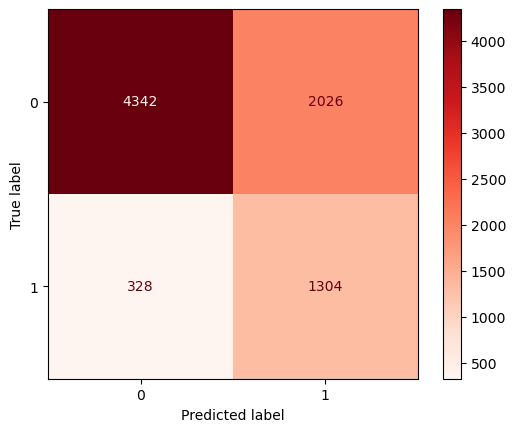

In [104]:
# Check Performance Model against Test-Set

y_pred_train_final = rf_best.predict(X_train_capped)

print('Recall Score - Train Set   : ', recall_score(y_train, y_pred_train_final), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_final), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_best, X_train_capped, y_train, cmap='Reds'))

atas ini kita coba di data testing terlebih dahulu. 

Recall 0.80 menunjukkan bahwa model cukup baik dalam mendeteksi churn (80% dari semua kasus churn berhasil diidentifikasi). untuk pertimbangan di training ini cukup bagus namun kita harus tes ulang di data tes. Ini hanya penunjukkan awal bahwa memang ada kenaikan performa pada testing yang sebelumnya 0,73 an setelah crosval menjadi 0,80. 

Precision 0.39 menunjukkan bahwa model memiliki banyak false positives (model sering salah menduga pelanggan non-churn sebagai churn). Ini berarti bahwa 61% dari prediksi churn oleh model sebenarnya adalah pelanggan yang tidak churn, yang bisa menyebabkan sumber daya dialokasikan secara tidak efisien. Namun kita balik ke objective kita awal kita tidak masalah dengan penambahan 

F1-Score 0.53: F1-score ini memberi gambaran keseimbangan antara precision dan recall. Tidak usah fokus disini fokus di recall saja. 

False negatif disini ditunjukkan dengan angka 328 pada gambar di atas. Performa cukup baik di testing karena sudah ada kenaikan dan target recall naik sudah tercapai. Next kita membahas mengenai test set. 

Recall Score - Test Set   :  0.762962962962963 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      1595
           1       0.38      0.76      0.51       405

    accuracy                           0.70      2000
   macro avg       0.65      0.72      0.64      2000
weighted avg       0.81      0.70      0.73      2000
 

Confusion Matrix      : 


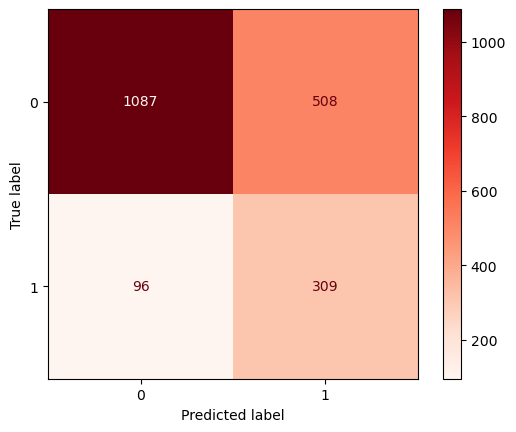

In [105]:
# Check Performance Model against Test-Set

y_pred_test_final = rf_best.predict(X_test)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_final), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_final), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_best, X_test, y_test, cmap='Reds'))

Kita mencoba pada data testing supaya memberikan gambaran lebih jelas. Model mampu menebak dengan benar dengan accuracy 70% Kasus true positive dan true negative yang cukup tinggi. Dengan data baru model mampu menebak 70% benar dan 30% kemungkinan salah nya. 

Recall juga sudah memberikan performa hingga 76%, naik dari 74% pada pengujian sebelumnya. Ini adalah angka yang cukup bagus. Namun disini yang jadi biayanya adalah penambahan kasus false positif yang sangat signifikan. Dari 300 kasus menjadi 500 kasus, namun harusnya angka ini cukup oke di industri perbankan karena cost untuk mendapatkan customer baru memang kadang lebih tinggi dibandingkan cost untuk mempertahankan customer(customer retention). 

Kita asumsi begini saja ya. Misalkan kita memberikan promo kepada 500 orang yang false positif itu, anggap promonya mungkin bebas fee kartu kredit tahunan untuk 500 orang (sebagai contoh). Harusnya orang ini kan aslinya memang mau stay di bank kita, namun kita kasih diskon free yearly charge orang itu pasti banyak yang akan ambil. Anggap fee 100000 >> 100K dikali 500 . Ya mungkin 50 juta setahun ya. Biaya ini mungkin bisa tertutup dengan kita menahan 300 customer yang terprediksi churn. Misal anggap saja 300 orang itu juga bayar kartu kredit juga 30 juta juga, dan kemudian dari 300 orang ini mereka melakukan transaksi, saya rasa ini bisa menutup kekurangan 20 juta ini. Sekali lagi ini hitungan cuma sebagai gambaran kasar saja , meskipun harus dipertimbangkan juga ROI atau aktivitas transaksi dari 300 orang tersebut.  

Kesimpulan model ini siap di deploy karena pada data testing menunjukkan performa yang lebih  baik dari sebelumnya. Data training menunjukkan angka 74 pada recall testing sebelum melakukan tuning, sekarang menjadi peningkatan menjadi 76% pada recall. 

## IX. Model Saving

In [106]:
# proses penyimpanan model
with open('best_model.pkl', 'wb') as file_1:
  pickle.dump(rf_best,file_1)

## X. Model Inference

This model inference will be executed in a separate notebook to ensure data confidentiality and prevent potential leakage.

## XI. Pengambilan Kesimpulan

### Recap 

#### EDA Recap (Ini merupakan EDA rekap di atas saja saya pindah untuk kemudahan pembacaan)

1. we have 20% churn customers. 
2. France has become our largest customer base.
3. Germany has the highest proportion of churned customers after the churn percentage is calculated based on the total number of customers in Germany.
4. Overall, the average credit score across the three countries is relatively similar.
5. Germany has the highest average account balance. 
6. Further investigation is needed into customer behavior in Germany, as the data shows they maintain higher average balances compared to other countries, yet they exhibit a higher tendency to churn.
7. In general, most of our customers only use one service or, at most, two of our services. It is important to improve this by encouraging them to adopt additional services.
8. In terms of percentage, the dataset shows a similar proportion of active and inactive users. However, the majority of churn comes from inactive users.
9. 70% of our customers are credit card holders. However, 14% of our customers not only hold a credit card but have also churned. This indicates that a significant portion of churn comes from credit card holders.
10. The age group of 40-50 years old represents the largest proportion of our customers who have churned from our services.
11. Our analysis reveals three major groups when examining the relationship between churn and balance: the 0 Balance group, the 1-100K group, and the 100K+ group. Among these, the 100K+ group dominates, accounting for 60% of the total churn. This highlights that customers with higher balances are more likely to churn compared to those in the other two groups.
12. After conducting the correlation test, it has been shown that age and balance do have a correlation with churn. While the correlation is not particularly strong, these features can still be valuable inputs for our machine learning model.

#### Model Recap 
Kita telah menggunakan 6 model yang berbeda dan didapatkan bahwa memang model RF mendapatkan nilai yang lebih baik dibandingkan model yang lain. Ditunjukkan dengan performa recall awal 0.75 pada testing dan 0.74 pada training. Setelah kita coba untuk cross validation ternyata performa model bisa meningkat menjadi 0.76 pada testing dan pada training menjadi 0.8. Model masih tetap good fit. dan ada kenaikan recall score pada data testing. 

### Insight 

Kita memerlukan investigasi lebih lanjut mengenai perilaku customer karena adanya indikasi di data bahwa memang customer dengan grup angka balance yang tinggi menunjukkan bahwa dia memiliki total churn yang tinggi. Jerman memiliki saldo yang lebih tinggi dibanding negara lain. Jadi mungkin insight ini bisa kita perdalam pasar jerman untuk menawarkan layanan-layanan investasi menggunakan pelayanan dari bank kita khususnya di bidang investasi uang penanaman modal deposito atau produk perbankan yang menghasilkan income untuk mereka. Karena dengan ini maka kita bisa mendapatkan profit yang lebih banyak dan mendapatkan churn rate yang rendah untuk kita juga disini. Karena mungkin mereka punya  layanan lebih banyak dengan kita maka mereka akan aktif dengan kita. Senada dengan active member memiliki peluang untuk churn rate yang lebih rendah dibandingkan passive member. Bisa difokuskan lagi balance tinggi adalah dengan kepemilikan saldo di atas 100.000 ribu Euro. 

Model telah menunjukkan performa yang baik. Model ini bisa dilakukan deployment karena sudah good fit dan memang angka recall yang sudah cukup tinggi 76%. Meskipun ada kemungkinan kita bisa membuat model lebih baik lagi dengan algoritma penguat mungkin dengan XG boost atau boosting-boosting yang lain. Perlu ditambahya korelasi yang agak menunjukkan faktor penentu yang lebih baik. Karena disini korelasi kuat pada data numerikal hanya yang memasukin korelasi moderat hanya satu saja. harusnya ada fitur lain yang bisa mendukung ini supaya model bisa membaca lebih baik lagi. 



### Summary

Perlu adanya investigasi lebih lanjut tentang behavior consument, mungkin adanya survey dengan konsumen yang mempunyai balance tinggi sehingga kita tau apa yang mereka inginkan. Untuk model bisa dilanjutkan dengan penambahan fitur yang mungkin mempunyai korelasi yang agak kuat lain atau dengan teknik-teknik boosting yang lain. 
